In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plot
dataset = pickle.load(open('../data/UrbanSound8K_test.pkl', 'rb'))

def draw(top, chroma, spec_contrast, tonnetz):
    fg, (ax1, ax2, ax3, ax4) = plot.subplots(nrows=4, gridspec_kw={'height_ratios': [60, 12, 7,6]})
    fg.set_figwidth(5.125)
    fg.set_figheight(10.625)
    fg.tight_layout()
    ax1.imshow(top, origin='lower')
    ax1.axis('off')
    ax2.imshow(chroma, origin='lower')
    ax2.axis('off')
    ax3.imshow(spec_contrast, origin='lower')
    ax3.axis('off')
    ax4.imshow(tonnetz, origin='lower')
    ax4.axis('off')
    plot.show()

In [5]:
def plot_lmc_mc(index):
    filename = dataset[index]['filename']
    samples = [segment['features'] for segment in dataset if segment['filename'] == filename]
    
    sample1 = dataset[index]['features']
    logmelspec = sample1['logmelspec']
    mfcc = sample1['mfcc']
    chroma = sample1['chroma']
    spec_contrast = sample1['spectral_contrast']
    tonnetz = sample1['tonnetz']

    draw(logmelspec, chroma, spec_contrast, tonnetz)
    draw(mfcc, chroma, spec_contrast, tonnetz)

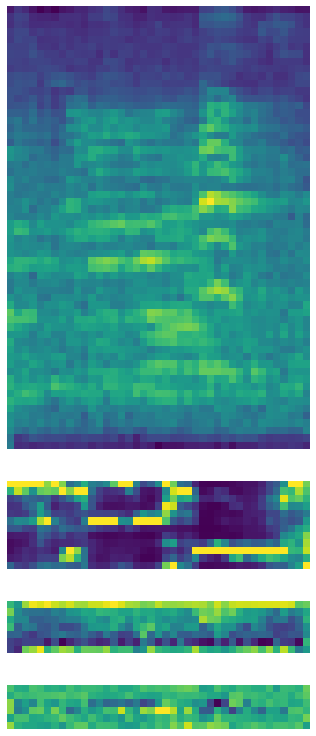

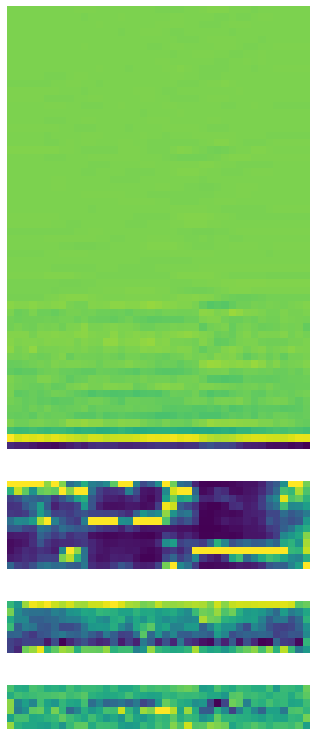

In [6]:
plot_lmc_mc(82)

Answer to A: siren


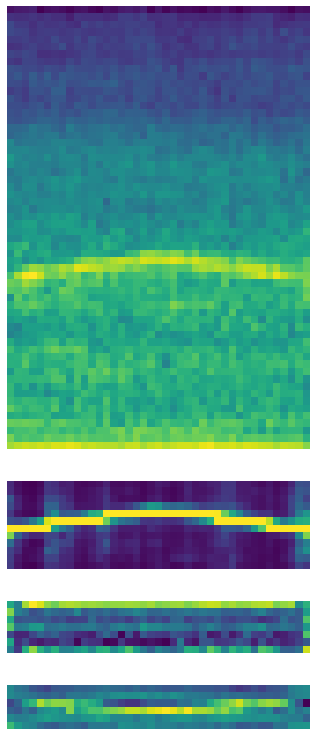

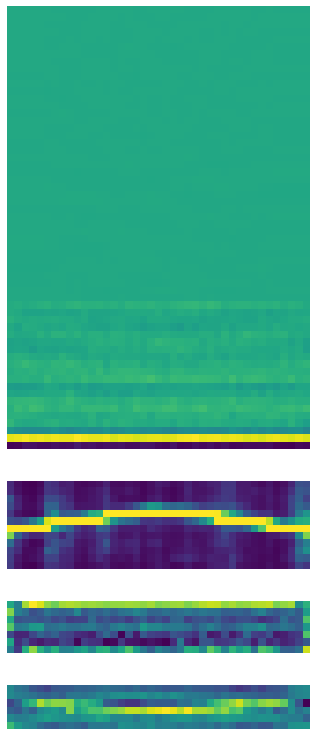

In [ ]:
# Qualitative results
import csv
import random

with open('../lmc_results.csv') as lmc_results, open('../mc_results.csv') as mc_results, open('../mlmc_results.csv') as mlmc_results, open('../tscnn_results.csv') as tscnn_results:
    lmc_reader = list(csv.reader(lmc_results, delimiter=','))
    mc_reader = list(csv.reader(mc_results, delimiter=','))
    mlmc_reader = list(csv.reader(mlmc_results, delimiter=','))
    tscnn_reader = list(csv.reader(tscnn_results, delimiter=','))
    
    # a) find one or more examples that are correctly classified by both LMCNet and MCNet
    lmc_mc_correct = [int(lmc[0]) for (lmc, mc) in zip(lmc_reader, mc_reader) if lmc[1] == mc[1] and lmc[1] == 'True']
    
    # b) find at least one case where one input is correct while the other is incorrect
    one_correct = [int(lmc[0]) for (lmc, mc) in zip(lmc_reader, mc_reader) if lmc[1] != mc[1]]
    
    # c) find one case where late fusion outperforms individual inputs
    tscnn_better = [int(lmc[0]) for (lmc, mc, tscnn) in zip(lmc_reader, mc_reader, tscnn_reader) if lmc[1] == 'False' and mc[1] == 'False' and tscnn[1] == 'True']
    
    # d) find one example where all methods fail
    all_fail = [int(readers[0][0]) for readers in zip(lmc_reader, mc_reader, tscnn_reader, mlmc_reader) if all(reader[1] == 'False' for reader in readers)]
    
    
    a_answer = random.choice(lmc_mc_correct)
    b_answer = random.choice(one_correct)
    c_answer = random.choice(tscnn_better)
    d_answer = random.choice(all_fail)
    
    print(f"Answer to A: {dataset[a_answer]['class']}")
    plot_lmc_mc(a_answer)
    plot_lmc_mc(b_answer)
    plot_lmc_mc(c_answer)
    plot_lmc_mc(d_answer)
    